# ML Lab Week 2 by Smeet Dedhia 200968236
## Excercise 2

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

### Q8]Metadata for IRIS dataset

Predicted attribute: class of iris plant

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:-- Iris Setosa-- Iris Versicolour-- Iris Virginica

In [2]:
iris = pd.read_csv('iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Q9]Visualisations

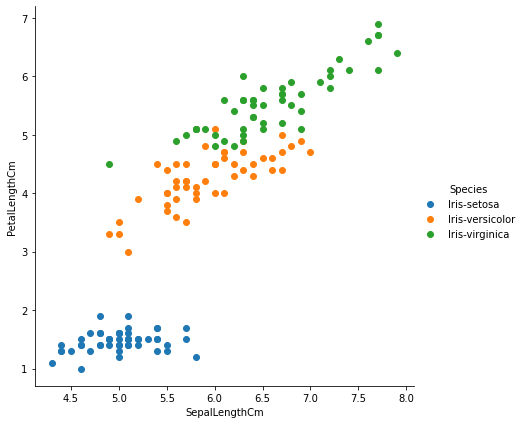

In [3]:
sns.FacetGrid(iris, hue ="Species",height = 6).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

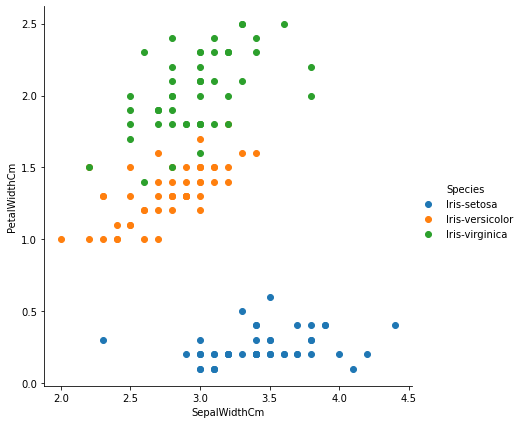

In [4]:
sns.FacetGrid(iris, hue ="Species",height = 6).map(plt.scatter,'SepalWidthCm','PetalWidthCm').add_legend()

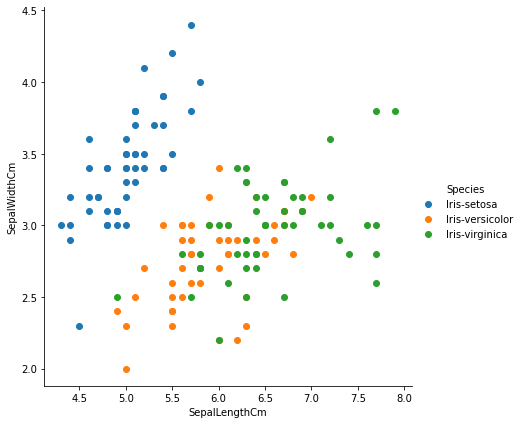

In [5]:
sns.FacetGrid(iris, hue ="Species",height = 6).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

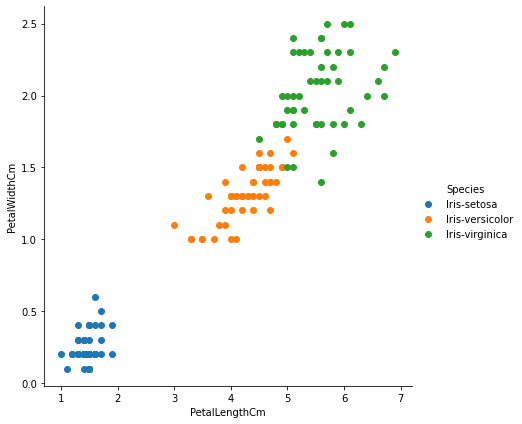

In [6]:
sns.FacetGrid(iris, hue ="Species",height = 6).map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()

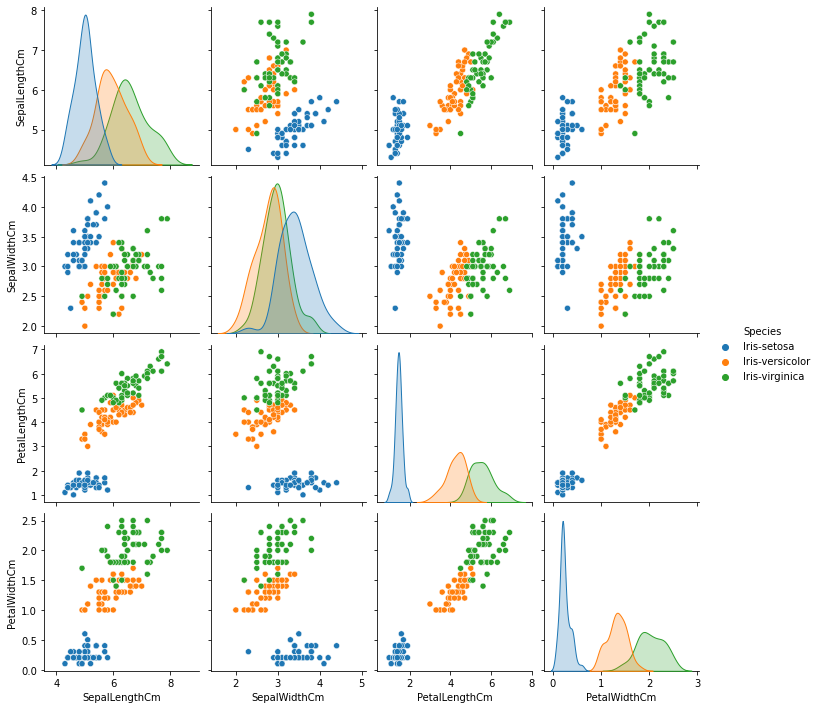

In [7]:
sns.pairplot(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']], hue="Species")

### Q10]Logistic Regression Model

In [8]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
iris_scaled = pd.DataFrame(iris)
mscaler = MinMaxScaler()
for col in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    iris_scaled[col]=mscaler.fit_transform(iris_scaled[col].values.reshape(-1,1))
iris_scaled

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...,...
145,146,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,147,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,148,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,149,0.527778,0.583333,0.745763,0.916667,Iris-virginica


In [10]:
x = iris_scaled[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y= iris_scaled['Species']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
logreg.coef_

array([[-1.21141352,  1.30964222, -2.4973769 , -2.45895275],
       [ 0.25837619, -1.32491546,  0.48287512, -0.32971248],
       [ 0.95303733,  0.01527324,  2.01450178,  2.78866523]])

### Q11] Analysis of Logistic Regression

In [11]:
print("Accuracy Score for Logistic Regression Model: ")
logreg.score(x_test, y_test)

Accuracy Score for Logistic Regression Model: 


0.8888888888888888

In [12]:
y_test.value_counts()

Iris-virginica     17
Iris-versicolor    15
Iris-setosa        13
Name: Species, dtype: int64

In [13]:
#Confusion Matrix
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index=['True-sentosa','True-versicolor','True-virginica'], columns=['Pred-sentosa','Pred-versicolor','Pred-virginica'])
cm

,Pred-sentosa,Pred-versicolor,Pred-virginica
True-sentosa,13,0,0
True-versicolor,0,12,3
True-virginica,0,2,15


[Text(0.5, 1.0, 'Heatmap for Confusion Matrix')]

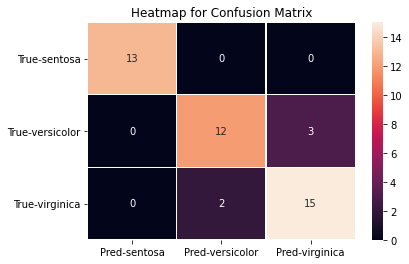

In [14]:
#Visualisation of Performance of Logistic Regression Model
sns.heatmap(cm, linewidths = 0.30, annot = True).set(title="Heatmap for Confusion Matrix")

### Q12]Using KNN for Prediction

In [15]:
x2 = iris_scaled[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y2= iris_scaled['Species']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=.3, random_state=30)
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x2_train, y2_train)
y2_pred2 = neigh.predict(x_test)
print("Accuracy Score:")
print(neigh.score(x2_test, y2_test))

Accuracy Score:
0.9555555555555556


In [16]:
#Calculating, Printing & Storing scores for KNN models with no. of neighbours in range(1,21)
a = []
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(x_train, y_train)
    y_pred2 = neigh.predict(x_test)
    a.append(neigh.score(x_test, y_test))
    print(neigh.score(x_test, y_test))

0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111
0.9111111111111111


Text(0, 0.5, 'Accuracy')

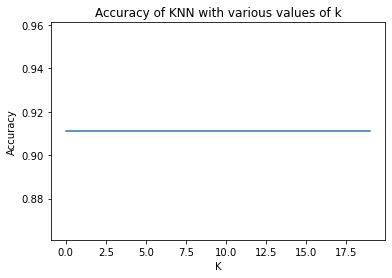

In [17]:
plt.title("Accuracy of KNN with various values of k")
plt.plot(a)
plt.xlabel("K")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Error rate')

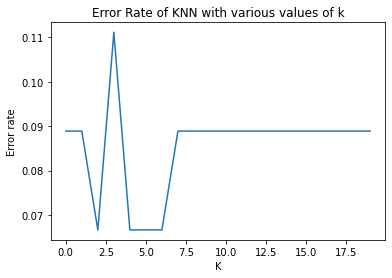

In [18]:
#Calculating, Printing & Storing error rate for KNN models with no. of neighbours in range(1,21)
error_rate = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.title("Error Rate of KNN with various values of k")
plt.plot(error_rate)
plt.xlabel("K")
plt.ylabel("Error rate")

### Q13] Identifying best k for the model
From the above graphs we find than for K=5 we have the highest accuracy and the lowest error.

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test, y_test)

0.9333333333333333

#### Q14]Logistic Regression vs KNeighboursClassifier
We can see that the accuracy of the model is better when we use Logistic Regression (95%) vs when we use KNN(93%). Also as KNN is lazy learning, all its computations need to be done on the spot where as logistic model can be kept ready from previous data. Hence, overall, it is better to use Logistic Regression for IRIS dataset